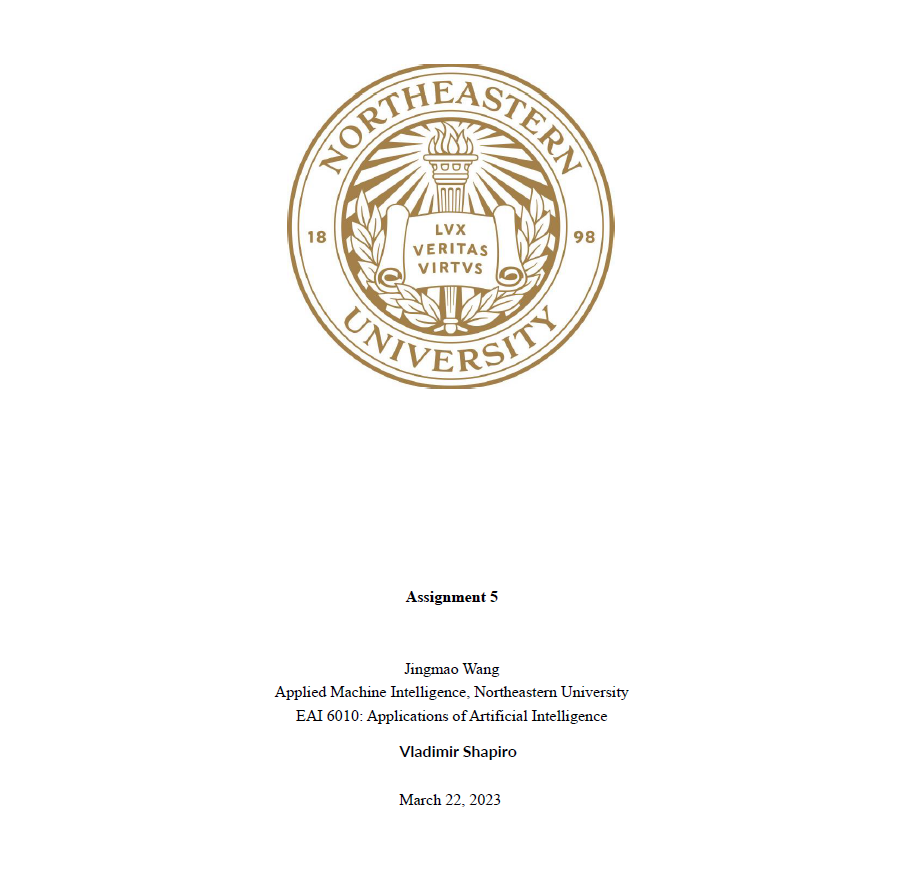

# Introduction

In this assignment, we will explore the Wavefront algorithm, a search algorithm for robot navigation in a domain with obstacles and we will Use 4-connectivity and 8-connectivity to realize it.

# Analysis

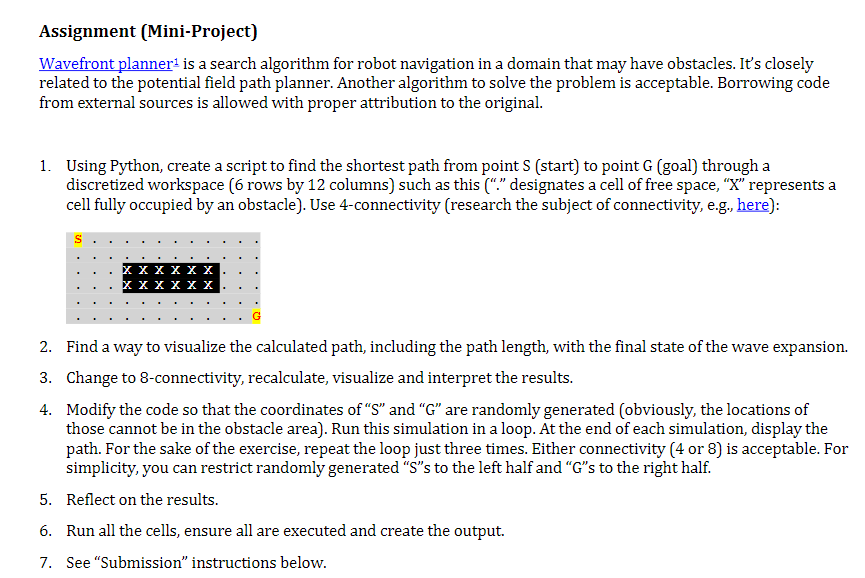

## A1

First we define a workspace((6 rows by 12 columns, ".” designates a cell of free space, "X” represents a cell fully occupied by an obstacle)

In [1]:
import numpy as np
# Define the workspace
workspace = [
    ["S", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", "."],
    [".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", "."],
    [".", ".", ".", "X", "X", "X", "X", "X", "X", ".", ".", "."],
    [".", ".", ".", "X", "X", "X", "X", "X", "X", ".", ".", "."],
    [".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", "."],
    [".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", "G"]
]
# Find the starting and ending points
start_point = None                   # initialization
end_point = None
for i in range(len(workspace)):      # search the position of 'S' and 'G', 'S' as the start point, 'G' as the Goal point
    for j in range(len(workspace[0])):
        if workspace[i][j] == "S":
            start_point = (i, j)
        elif workspace[i][j] == "G":
            end_point = (i, j)

Next, define some function to implement the wavefront algorithm

In [2]:
# Define a function to get the neighbors of a cell

#check if the cells above, below, left and right of the current cell are free space and if it is an obstacle.
def get_neighbors(cell):
    neighbors = []
    row, col = cell
    for dr, dc in [(0, 1), (1, 0), (0, -1), (-1, 0)]:# dr means Offset of rows, dc means Offset of cols 
                                                      # (0,1) means adding one to the column of the current point, one unit to the right
        r, c = row + dr, col + dc
        if 0 <= r < len(workspace) and 0 <= c < len(workspace[0]) and workspace[r][c] != "X": 
            #check whether the neighbors are free space and obstacles.
            neighbors.append((r, c))  # append to neighbors
    return neighbors

# Define a function to perform wavefront search
def wavefront_search(start_point, end_point): # define function
    visited = set()  #  empty set
    queue = [start_point] # a list queue with the start_point as its first element
    distances = {start_point: 0} # keep track of the distance between each cell and the start_point
    previous = {start_point: None} # keep track of the previous cell in the shortest path.
    while queue: 
        current_cell = queue.pop(0) #remove first cell
        if current_cell == end_point: # it means finding the shortest path
            path = []
            while current_cell != start_point: 
                path.append(current_cell)
                current_cell = previous[current_cell]
            path.append(start_point)
            path.reverse() # returns a tuple containing the length of the shortest path
            return distances[end_point], path # returns a tuple containing the length of the shortest path
        visited.add(current_cell)
        for neighbor in get_neighbors(current_cell): # checks whether it has already been visited
            if neighbor not in visited:
                queue.append(neighbor)
                distances[neighbor] = distances[current_cell] + 1
                previous[neighbor] = current_cell

we have already define some function to find the shortest path, these function use 4-connectivity.

In [3]:
# Find the shortest path and print it out
shortest_path_length, shortest_path = wavefront_search(start_point, end_point)
print("Shortest path length:", shortest_path_length)
print("Shortest path:", shortest_path)

Shortest path length: 16
Shortest path: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11)]


Above is the shortest path length and index of the shortest path in this workspace.

## A2

Next, visualize the calculated path, including the path length and the final state of the wave expansion. we need to add a dictionary to save each cell's value of wavefront expansion and define a plot function.

In [6]:
# The only difference between this new function and the one above is this function
# add a new dictionary to save each cell's value of wavefront expansion
def wavefront_search_new(start_point, end_point):
    visited = set()
    queue = [start_point]
    distances = {start_point: 0}
    previous = {start_point: None}
    wavefront = {start_point: 0}  # here is a new Dic
    while queue:
        current_cell = queue.pop(0)
        if current_cell == end_point:
            path = []
            while current_cell != start_point:
                path.append(current_cell)
                current_cell = previous[current_cell]
            path.append(start_point)
            path.reverse()
            return distances[end_point], path, wavefront
        visited.add(current_cell)
        for neighbor in get_neighbors(current_cell):
            if neighbor not in visited:
                queue.append(neighbor)
                distances[neighbor] = distances[current_cell] + 1
                previous[neighbor] = current_cell
                wavefront[neighbor] = distances[neighbor] 

Now we get the value of wavefront expansion, and next, define a plot function.

In [7]:
import matplotlib.pyplot as plt

# Define the colors for the visualization
colors = {
    "X": "black",   # obstacles are black
    "S": "green",   # start point is green
    "G": "red",     # goal point is red
    ".": "white",   # free spaces are white
    "*": "yellow",  # cells in the shortest path are yellow
}


In [8]:
def plot_workspace(workspace, wavefront, shortest_path): # use this function to plot  
    
    fig, ax = plt.subplots() # Create a new plot

    # Set the axis limits and ticks
    ax.set_xlim(-0.5, len(workspace[0]) - 0.5) # limit x and y-axis
    ax.set_ylim(len(workspace) - 0.5, -0.5)
    plt.xticks([])# remove ticks
    plt.yticks([])

    # Draw the workspace cells
    for i in range(len(workspace)):# loop
        for j in range(len(workspace[0])):
            ax.add_patch(plt.Rectangle((j - 0.5, len(workspace) - i - 1 - 0.5), 1, 1, # create a rectangle with a color
                                       color=colors[workspace[i][j]], alpha=0.5))

    # Draw the wavefront expansion
    for cell, value in wavefront.items():#loop each cell and use .text() to label it with the value.
        ax.text(cell[1], len(workspace) - cell[0] - 1, str(value), ha="center", va="center")

    # Draw the shortest path
    for i in range(len(shortest_path) - 1): #iterates over each pair of adjacent cells in shortest_path
        ax.plot([shortest_path[i][1], shortest_path[i + 1][1]], 
                [len(workspace) - shortest_path[i][0] - 1, len(workspace) - shortest_path[i + 1][0] - 1], 
                color=colors["*"], linewidth=2) # use ax.plot() to draw a line between S and G in shortest path.

    # Add the start and end points
    start_point = np.array(shortest_path[0])
    end_point = np.array(shortest_path[-1])
    ax.scatter(start_point[1], len(workspace) - start_point[0] - 1, color=colors["S"], s=100) # plot start_point
    ax.scatter(end_point[1], len(workspace) - end_point[0] - 1, color=colors["G"], s=100) # plot goal_point

    # Add a title and show the plot
    ax.set_title("Shortest path length: {}".format(len(shortest_path) - 1))

    plt.gca().invert_yaxis() # invert y axis 
    plt.show()

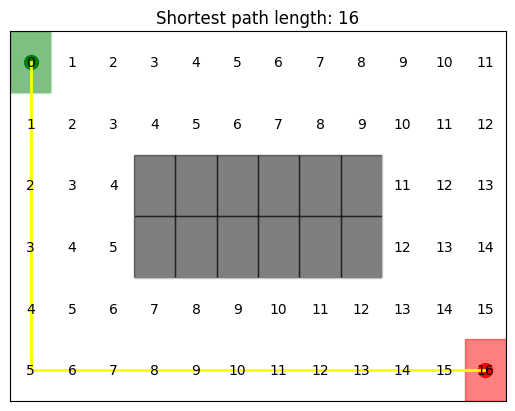

                    Figure 1: Maze(4-connectivity)


In [9]:
# Find the shortest path
distance, shortest_path, wavefront = wavefront_search_new(start_point, end_point)

# Plot the workspace with the wavefront and shortest path
plot_workspace(workspace, wavefront, shortest_path)
print('                    Figure 1: Maze(4-connectivity)')

Figure 1 is a maze with 6 rows and 12 columns, the gray areas are obstructions, the green is the start point and red is the goal point, and the yellow line means the shortest path from the start point to the goal point. 

In the title, it shows the shortest path length is 16. The number of white areas means the value of wave expansions.


Figure 1 uses 4-connectivity, which means that it can only move up, down, left, and right.

## A3

Next, change to 8-connectivity and see what changes would occur.

In [10]:
# define new function to get neighbors 
# The only difference between this new function and the one above is this function
# add a new direction 
def get_neighbors_8(cell):
    neighbors = []
    row, col = cell
    for dr, dc in [(1, -1), (1, 1), (-1, 1), (-1, -1),(0, 1), (1, 0), (0, -1), (-1, 0) ]:    # include diagonal neighbors
        r, c = row + dr, col + dc
        if 0 <= r < len(workspace) and 0 <= c < len(workspace[0]) and workspace[r][c] != "X":
            neighbors.append((r, c))
    return neighbors

Next, define a new function to calculate distance.

In [11]:
#The only difference between this new function and the one above is this function

# Set the diagonal distance to 1.414

def wavefront_search_8(start_point, end_point):
    visited = set()
    queue = [start_point]
    distances = {start_point: 0}
    previous = {start_point: None}
    wavefront = {start_point: 0}
    while queue:
        current_cell = queue.pop(0)
        if current_cell == end_point:
            path = []
            while current_cell != start_point:
                path.append(current_cell)
                current_cell = previous[current_cell]
            path.append(start_point)
            path.reverse()
            return distances[end_point], path, wavefront
        visited.add(current_cell)
        for neighbor in get_neighbors_8(current_cell):
            if neighbor not in visited:
                queue.append(neighbor)
                
                if abs(neighbor[0] - current_cell[0]) == 1 and abs(neighbor[1] - current_cell[1]) == 1: # change here
                    distance = distances[current_cell] + 1.414
                else:
                    distance = distances[current_cell] + 1
                if neighbor not in distances or distance < distances[neighbor]:
                    distances[neighbor] = distance
                    previous[neighbor] = current_cell
                    wavefront[neighbor] = distance
    return None, [], {}  

Next, define new plot function.

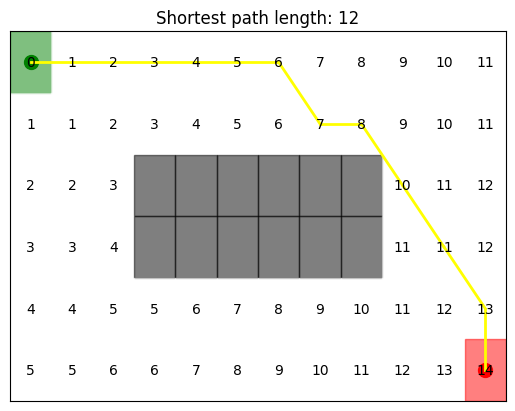

                    Figure 2: Maze(8-connectivity)


In [12]:
# The only difference between this new function and the one above is this function
# Keep only integers of distance
def plot_workspace_8(workspace, wavefront, shortest_path): 
    
    fig, ax = plt.subplots()

    ax.set_xlim(-0.5, len(workspace[0]) - 0.5) 
    ax.set_ylim(len(workspace) - 0.5, -0.5)
    plt.xticks([])
    plt.yticks([])

    for i in range(len(workspace)):
        for j in range(len(workspace[0])):
            ax.add_patch(plt.Rectangle((j - 0.5, len(workspace) - i - 1 - 0.5), 1, 1, 
                                       color=colors[workspace[i][j]], alpha=0.5))

    for cell, value in wavefront.items():
        ax.text(cell[1], len(workspace) - cell[0] - 1, "{:.0f}".format(value), ha="center", va="center") # change here

    # Draw the shortest path
    for i in range(len(shortest_path) - 1): 
        ax.plot([shortest_path[i][1], shortest_path[i + 1][1]], 
                [len(workspace) - shortest_path[i][0] - 1, len(workspace) - shortest_path[i + 1][0] - 1], 
                color=colors["*"], linewidth=2)

    start_point = np.array(shortest_path[0])
    end_point = np.array(shortest_path[-1])
    ax.scatter(start_point[1], len(workspace) - start_point[0] - 1, color=colors["S"], s=100) 
    ax.scatter(end_point[1], len(workspace) - end_point[0] - 1, color=colors["G"], s=100) 

    ax.set_title("Shortest path length: {}".format(len(shortest_path) - 1))

    plt.gca().invert_yaxis() 
    plt.show()


# Find the shortest path
distance, shortest_path, wavefront = wavefront_search_8(start_point, end_point)

# Plot the workspace with the wavefront and shortest path
plot_workspace_8(workspace, wavefront, shortest_path)
print('                    Figure 2: Maze(8-connectivity)')

Figure 2 is a maze with 6 rows and 12 columns, the gray areas are obstructions, the green is the start point and red is the goal point, and the yellow line means the shortest path from the start point to the goal point.

In the title, it shows the shortest path length is 12. The number of white areas means the value of wave expansions.

Figure 2 uses 8-connectivity, which means that it can move not only up, down, left, and right, but also diagonally.

## A4 & A5


In [15]:
import random  # import random library

In [23]:
def random_maze(): # this function can create 'S' and 'G' randomly.
    workspace_random = [
    [".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", "."],
    [".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", "."],
    [".", ".", ".", "X", "X", "X", "X", "X", "X", ".", ".", "."],
    [".", ".", ".", "X", "X", "X", "X", "X", "X", ".", ".", "."],
    [".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", "."],
    [".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", "."]] # define a workspace without 'S' and 'G'
    
    
    num_rows = len(workspace_random)  # get lenth of row of workspacerow
    num_cols = len(workspace_random[0])# column
    start_row = random.randint(0, num_rows-1) # set the range of start_row
    start_col = random.randint(0, num_cols//2-1)# set the range of start_col
    goal_row = random.randint(0, num_rows-1)# set the range of goal_row
    goal_col = random.randint(num_cols//2, num_cols-1)# set the range of goal_col
    
    while workspace[start_row][start_col] == "X": # create Start point
      start_row = random.randint(0, num_rows-1)
      start_col = random.randint(0, num_cols//2-1)
        
    while workspace[goal_row][goal_col] == "X": # create Goal point
      goal_row = random.randint(0, num_rows-1)
      goal_col = random.randint(num_cols//2, num_cols-1)
        
    workspace_random[start_row][start_col] = "S"# save start point
    workspace_random[goal_row][goal_col] = "G" # save goal point.
    workspace_random1 = workspace_random
    
    
    
    start = None                   # initialization
    end = None
    for i in range(len(workspace_random1)):       # get the coordinates S and G 
        for j in range(len(workspace_random1[0])):
            if workspace_random1[i][j] == "S":
                start = (i, j)
            elif workspace_random1[i][j] == "G":
                end= (i, j)
    distance, shortest_path, wavefront = wavefront_search_8(start, end) # use above function to show path
    plot_workspace_8(workspace_random1, wavefront, shortest_path) # use above function to show path
    

Here are three example.

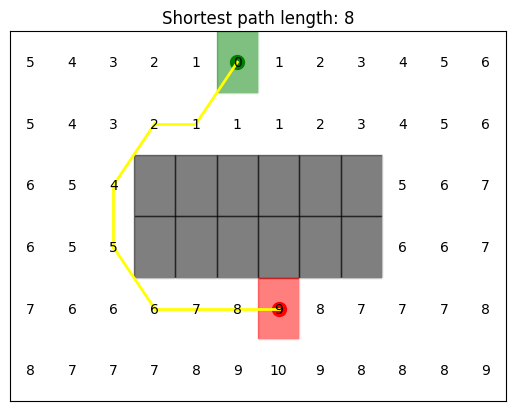

                         Figure 3: Maze(8-connectivity)


In [20]:
random_maze()
print('                         Figure 3: Maze(8-connectivity)')

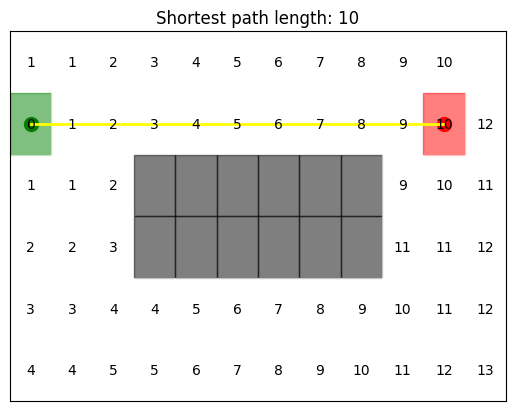

                      Figure 4: Maze(8-connectivity)


In [21]:
random_maze()
print('                      Figure 4: Maze(8-connectivity)')

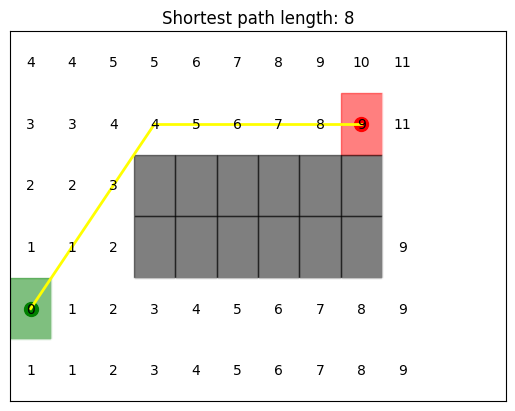

                         Figure 5: Maze(8-connectivity)


In [22]:
random_maze()
print('                         Figure 5: Maze(8-connectivity)')

Figure 3,4,5 are mazes with 6 rows and 12 columns, the gray areas are obstructions, the green is the start point and red is the goal point, and the yellow line means the shortest path from the start point to the goal point.

In the title, it shows the shortest path length. The number of white areas means the value of wave expansions.

Figure 3,4,5 use 8-connectivity, which means that it can move not only up, down, left, and right, but also diagonally.

# Conclusion

In this assignment, we explored the Wavefront algorithm,and we Use 4-connectivity and 8-connectivity to realize it.

# References

How to build a robot tutorials. Society of Robots. (n.d.). Retrieved March 25, 2023, from https://www.societyofrobots.com/programming_wavefront.shtml 